# Clustering
***In this tutorial we are going to cover three methods on clustering: K means, Guassian Mixture model and Agglomerative Hierarchical Clustering. To understand the customers like who can be easily converge Target customer so that the sense can be given to marketing team and plan the strategy accordingly. ***

# Mall Customer

***This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis. Suppose you are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.***

***You own the mall and want to understand the customers like who can be easily converge Target customer so that the sense can be given to marketing team and plan the strategy accordingly..***

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Checking null values
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

***There are null values in Gender, lets fix them***

In [ ]:
# fill NaN values in the 'Gender' column with a default value ('U' for 'Unknown')
df['Gender'] = df['Gender'].fillna('Unknown')

In [ ]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Checking dublicate values
df.duplicated().sum()

0

***There are no dublicate values in the present data.***

# Plotting correlation

In [ ]:
df = df.drop(['CustomerID', 'Gender'], axis=1)

In [ ]:
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


<AxesSubplot:>

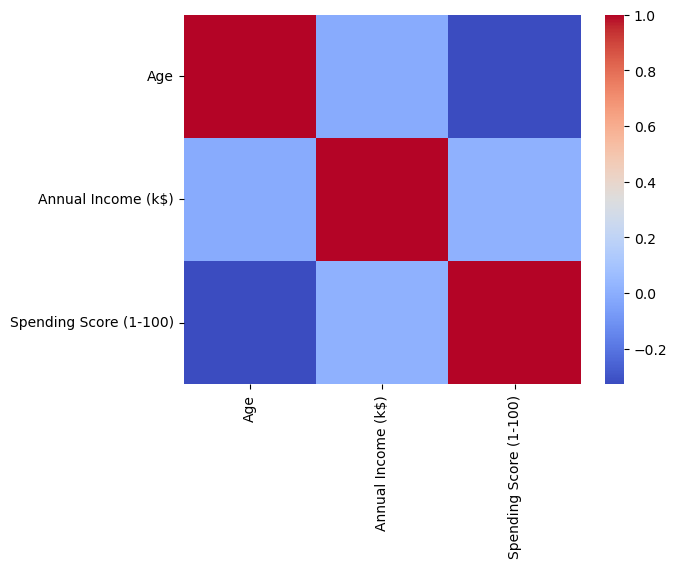

In [ ]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

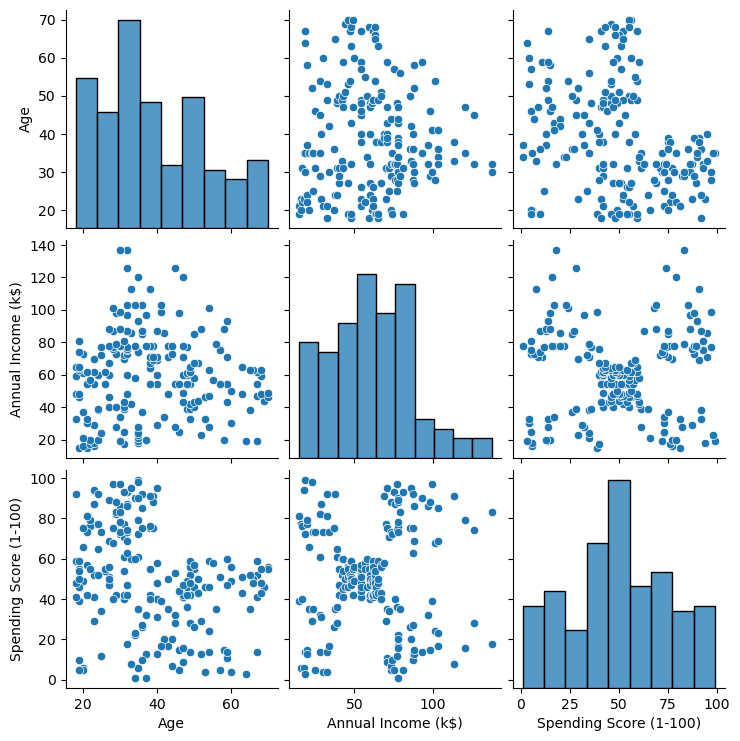

In [ ]:
# Plot pairwise relationships between variables
sns.pairplot(df, diag_kind='hist')

***The pairwise plot will display scatter plots of each pairwise combination of variables, with histograms of each variable on the diagonal. By examining the scatter plots, any patterns or relationships between the variables that may be relevant for given marketing team and plan the strategy accordingly.***

# Explotary data analysis

In [ ]:
cols = list(df.columns)
cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Text(0.5, 0.98, 'Distribution of Numerical Variables')

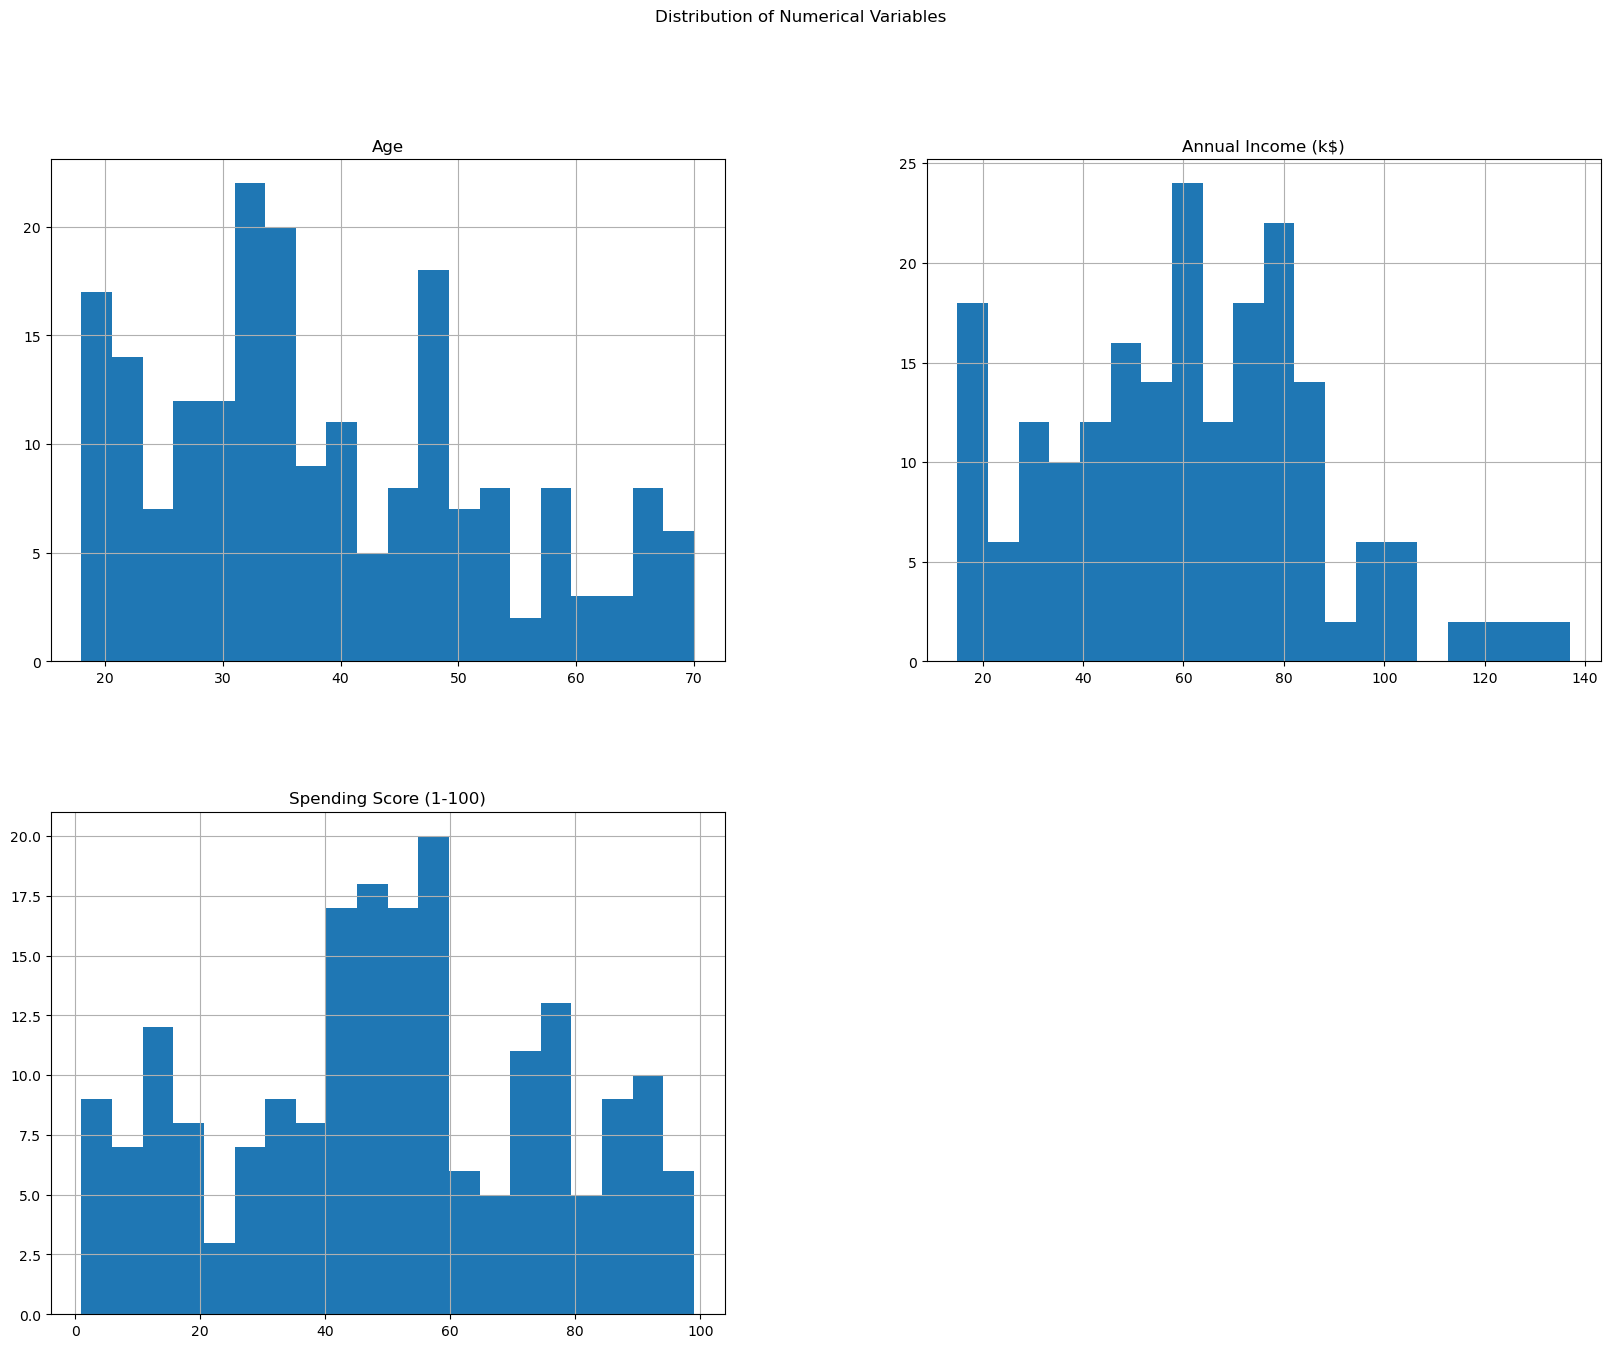

In [ ]:
# Distribution of the numerical variables

df[cols].hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Variables')

# Manageging outliers

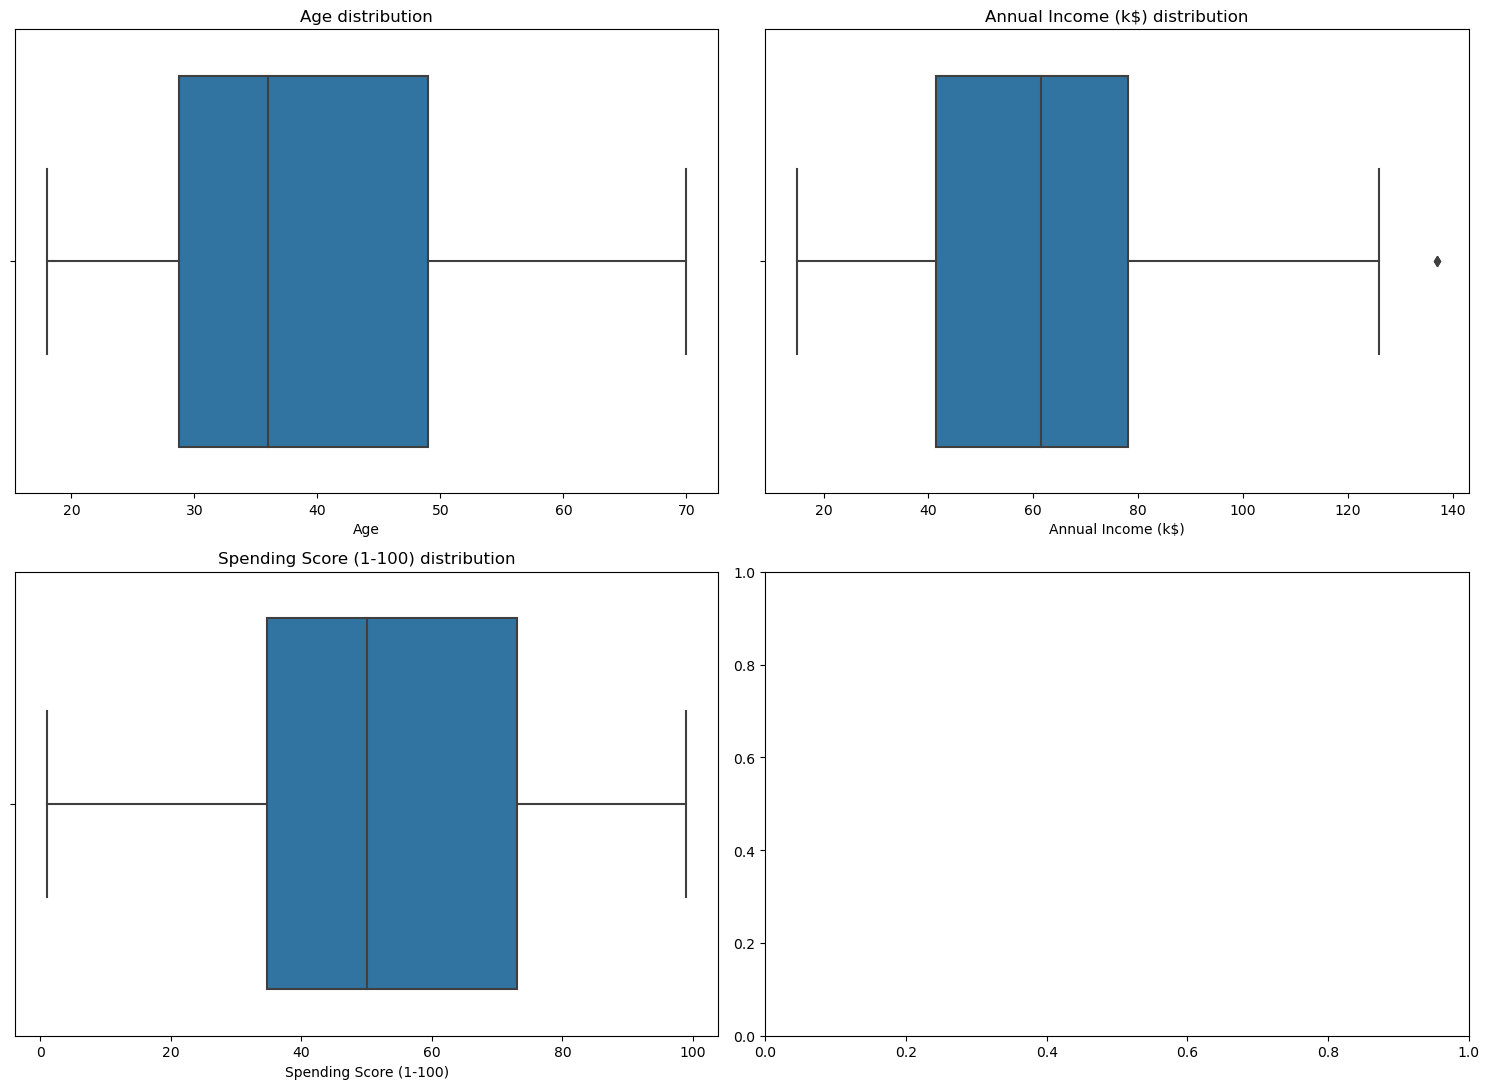

In [ ]:
# boxplots
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,11))
for i in range(len(cols)):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[cols[i]])
  title = cols[i] + ' distribution'
  plt.title(title)
plt.tight_layout()
plt.show()
    

In [ ]:
from scipy import stats
# Identify outliers using z-score
z = np.abs(stats.zscore(df))
threshold = 3
outliers = np.where(z > threshold)

# Replace outliers with median
for col in df.columns:
    median = np.median(df[col])
    df.loc[df[col] > (median + threshold * np.std(df[col])), col] = median
    df.loc[df[col] < (median - threshold * np.std(df[col])), col] = median

In [ ]:
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                15.0                      39
1     21                15.0                      81
2     20                16.0                       6
3     23                16.0                      77
4     31                17.0                      40
..   ...                 ...                     ...
195   35               120.0                      79
196   45               126.0                      28
197   32               126.0                      74
198   32               137.0                      18
199   30               137.0                      83

[200 rows x 3 columns]


# Scaling the data

***Every feature has a different range for the values. While model fitting, the algorithm might give more weight to features which have higher range of values. This introduces bias in model building, which needs to be corrected.<br>
StandardScaler is used from sklearn library where the values of all features will be scaled in such a way that the mean and standard deviation become 0 and 1 respectively for each feature.<br>***

In [ ]:
# Initialising StandardScaler function
from sklearn.preprocessing import StandardScaler
# Scaling the data
scaler = StandardScaler()
cols_to_scale = ['Annual Income (k$)', 'Spending Score (1-100)']
df_scaled = scaler.fit_transform(df[cols_to_scale])

In [ ]:
# create a new dataframe with the scaled values
df_scaled = pd.DataFrame(df_scaled, columns=cols_to_scale)

# K Means Clustering<br>
***K means clustering is an unsupervised learning that groups an unlabelled data into k different cluster such that each data belong to one group which is most similar to it.***

In [ ]:
# Using the elbow method to find optimal k number of cluster

k_vals = np.arange(1,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(df_scaled.iloc[:,1:])
  wss.append([i,kmodel.inertia_])

print(wss)

[[1, 199.99999999999997], [2, 69.10981936165975], [3, 20.941154548189314], [4, 13.36530804988292], [5, 7.754070331346365], [6, 5.1825031517548], [7, 3.8924939475116895], [8, 2.95863329833852], [9, 2.318412437172986], [10, 1.9042078052104818], [11, 1.5696599408336451], [12, 1.3115030378451225], [13, 1.1515971931298028], [14, 0.9931592749973772]]


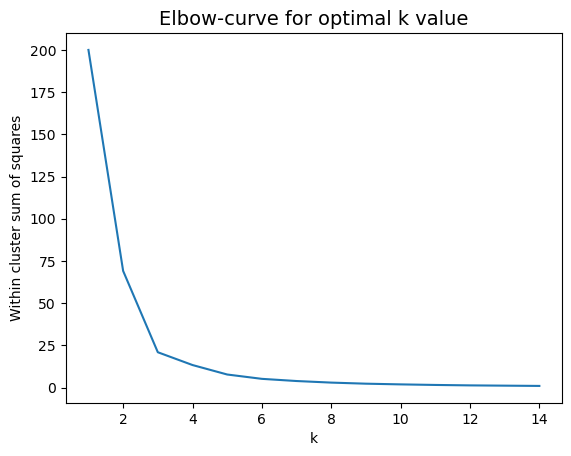

In [ ]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow-curve for optimal k value', fontsize = 14)
plt.show()

***The graph is plotted between the sum of squared distance between each point and the centroid in a cluster. The plot of the WCSS with the K value looks like an Elbow. Looking at the graph we observe that the curve will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.***

In [ ]:
#  Looking into the graph we find optimal number of cluster is 3.

In [ ]:
# K=3

kmodel_new = KMeans(n_clusters = 3)

kmodel_new.fit(df_scaled.iloc[:,1:]) # the first column 'country' is left out as Euclidean distance method will not work with string values
pred_labels = kmodel_new.predict(df_scaled.iloc[:,1:])


In [ ]:
print(len(pred_labels))

200


In [ ]:
# Adding the cluster labels column to the original data
df['cluster_label'] = pred_labels
df.reset_index(drop = True, inplace = True)
display(df.head())

,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,19,15.0,39,0
1,21,15.0,81,1
2,20,16.0,6,2
3,23,16.0,77,1
4,31,17.0,40,0


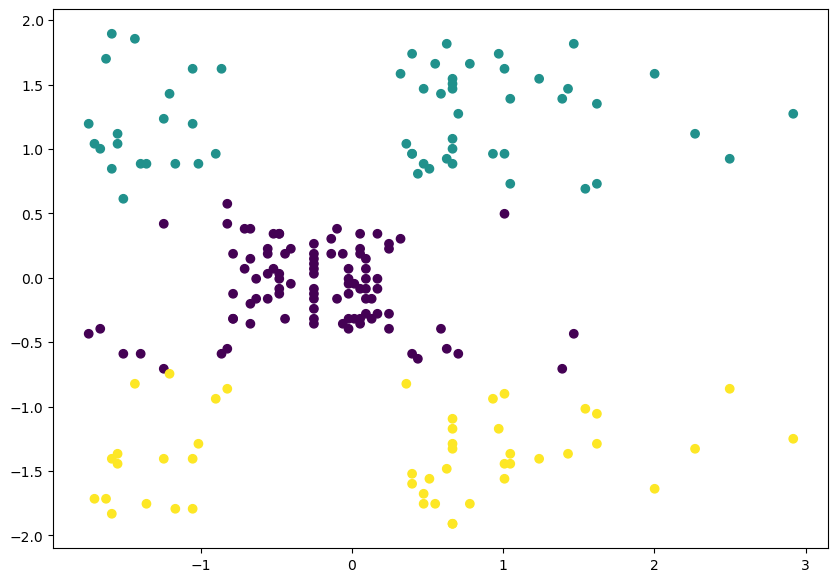

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'], c=pred_labels) 

In [ ]:
# Out of the 142 countries, almost 50% are in cluster 2.
display(df.cluster_label.value_counts())

0    95
1    58
2    47
Name: cluster_label, dtype: int64

In [ ]:
#Calculating DB index
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(df_scaled.iloc[:,1:], pred_labels)
print(db_index)

0.4226733765087833


# Gaussian Mixture Models (GMMs)
It assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

In [ ]:
n_components = np.arange(1, 41)
models = [GaussianMixture(n, 
                           random_state=0).fit(df_scaled.iloc[:,1:]) for n in n_components]


# Bayesian information criterion (BIC)
It is an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data.

In [ ]:
models[0].bic(df_scaled.iloc[:,1:])

578.1720480150651

In [ ]:
gmm_model_bic=pd.DataFrame({"n_components" : n_components, "covariance_type" : 'full',
                                  "BIC" : [m.bic(df_scaled.iloc[:,1:]) for m in models]})


In [ ]:
gmm_model_bic.head()

,n_components,covariance_type,BIC
0,1,full,578.172048
1,2,full,588.482810
2,3,full,561.227835
3,4,full,573.546752
4,5,full,573.867436


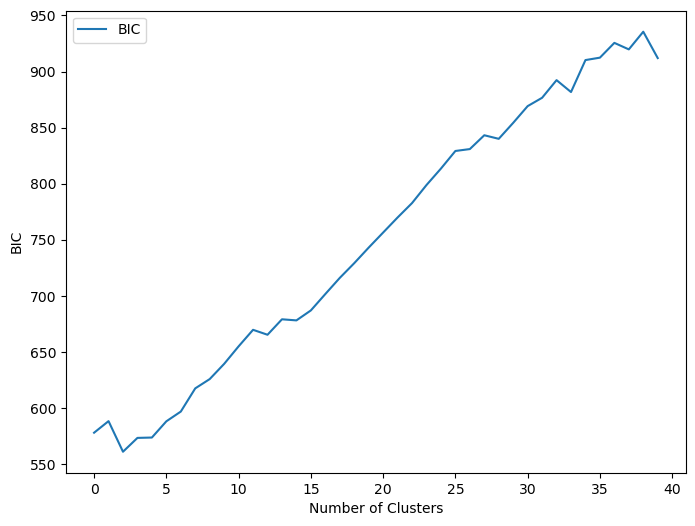

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_bic[["BIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("BIC")
plt.savefig("GMM_model_with_BIC_Scores.png",
                    format='png',dpi=150)

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled.iloc[:,1:])

GaussianMixture(n_components=3)

In [ ]:
labels = gmm.predict(df_scaled.iloc[:,1:])
labels

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

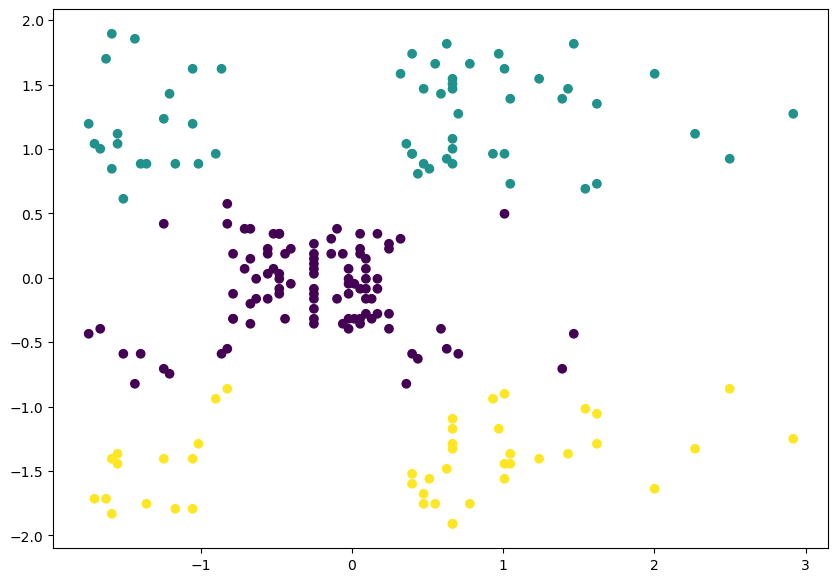

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'], c=labels) 

In [ ]:
# Probabilty 
probs = gmm.predict_proba(df_scaled.iloc[:,1:])
probs

array([[9.91298359e-01, 5.17978308e-05, 8.64984300e-03],
       [1.66314577e-03, 9.98336854e-01, 4.00179728e-15],
       [3.84706383e-05, 7.77128770e-14, 9.99961529e-01],
       [9.11506830e-03, 9.90884932e-01, 2.06631176e-13],
       [9.94580876e-01, 7.32914046e-05, 5.34583282e-03],
       [1.38329864e-02, 9.86167014e-01, 5.46744939e-13],
       [3.84706383e-05, 7.77128770e-14, 9.99961529e-01],
       [5.11174293e-06, 9.99994888e-01, 6.78326076e-21],
       [1.10113579e-05, 9.89817752e-15, 9.99988989e-01],
       [6.91203218e-02, 9.30879678e-01, 2.47643324e-11],
       [1.17572669e-03, 2.25809472e-11, 9.98824273e-01],
       [5.02045737e-07, 9.99999498e-01, 3.40920249e-23],
       [1.81763585e-03, 4.67011366e-11, 9.98182364e-01],
       [9.11506830e-03, 9.90884932e-01, 2.06631176e-13],
       [7.61806327e-04, 1.09600464e-11, 9.99238194e-01],
       [3.91583758e-03, 9.96084162e-01, 2.90322653e-14],
       [9.43875581e-01, 1.27340719e-05, 5.61116854e-02],
       [4.59121053e-01, 5.40878

In [ ]:
# Optimal parametres in GMM
# print the converged log-likelihood value
print(gmm.lower_bound_)
 
# print the number of iterations needed for the log-likelihood value to converge
print(gmm.n_iter_) 

-1.2977398914527156
3


Hence, it needed 3 iterations for the log-likelihood to converge. If more iterations are performed, no appreciable change in the log-likelihood value can be observed.

# Agglomerative Hierarchical Clustering<br>
In Hierarchical Clustering, the aim is to produce a hierarchical series of nested clusters. A diagram called Dendrogram (A Dendrogram is a tree-like diagram that statistics the sequences of merges or splits) graphically represents this hierarchy and is an inverted tree that describes the order in which factors are merged (bottom-up view) or clusters are broken up (top-down view).<br>
In agglomerative clustering each data is treated as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

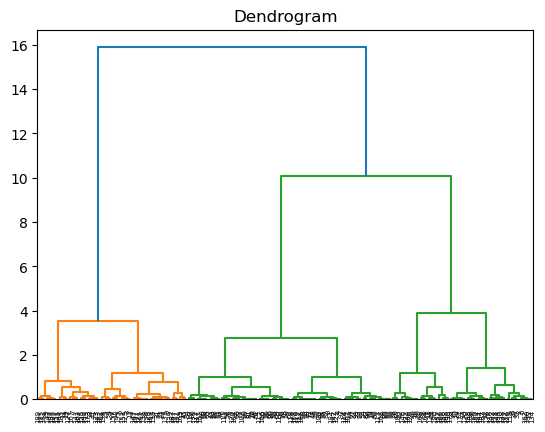

In [ ]:
# Using the dendrogram to find the optimal number of clusters 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_scaled.iloc[:,1:], method = 'ward'))
plt.title('Dendrogram')
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples.

In [ ]:
#Implementing an Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(df_scaled.iloc[:,1:])
clustering_model.labels_


array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

<Figure size 1000x700 with 0 Axes>

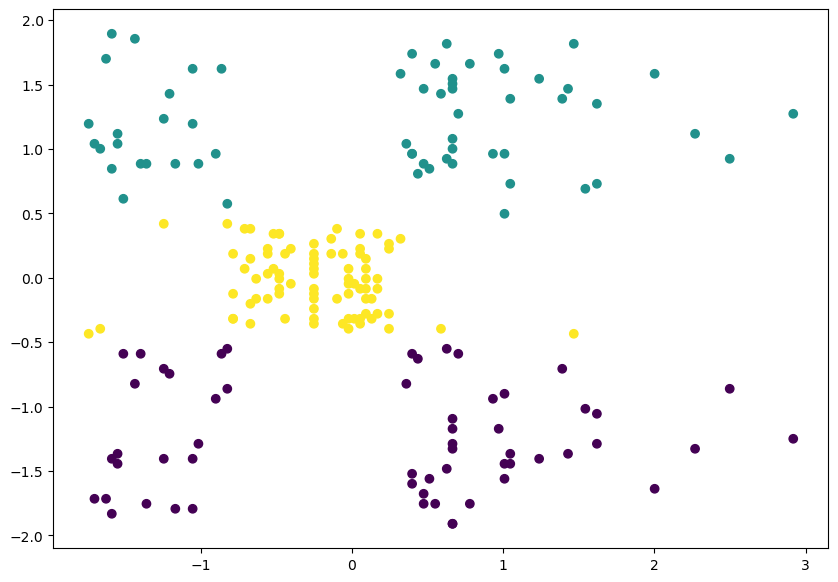

In [ ]:

plt.figure(figsize=(10, 7))  
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'],  c=clustering_model.labels_) 

# Exercise


***Q1. Read seed data and display the first five rows of the data set***

***Q2. Find the optimum number of k in range 2-10 for k means***

***Q3. Find the labels using k means***

***Q4. Find the cluster centre***

***Q5. Find the number of data in each cluster***